In [13]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [7]:
procs = [1] + list(range(4, 48 + 1, 4))
launches = [ launch for launch in procs for i in range(3)]

with open("parallel-08.output", "r") as file:
    chunks =[]
    for launch in launches:
        chunk = ""
        line_n = 0
        while line_n <= launch:
            line = file.readline()
            if line != '\n':
                line_n += 1
                chunk += line
        chunks.append(chunk[:-1])

In [8]:
data = []
for chunk, procs_n in zip(chunks, launches):
    trials = int(re.compile(" # of trials = (.*) ,").search(chunk).group(1))
    estimate = float(re.compile("estimate of pi is (.*) ").search(chunk).group(1))
    master_t = float(re.compile("master processor : (.*) ").search(chunk).group(1))
    procs_t = [float(re.compile("on processor {} : (.*) ".format(proc)).search(chunk).group(1)) for proc in range(1, procs_n)]
    data.append({"trials": trials, "estimate": estimate, "master_t": master_t, "procs_t": procs_t})

In [9]:
data[4]

{'trials': 100000000,
 'estimate': 3.14138216,
 'master_t': 0.64413674,
 'procs_t': [0.64407022, 0.64414092, 0.64370276]}

In [49]:
def get_formatted_data(output_name, error_name, launches):
    data = []
    trials_re = re.compile(" # of trials = (.*) ,")
    estimate_re = re.compile("estimate of pi is (.*) ")
    master_t_re = re.compile("master processor : (.*) ")
    elapsed_t_re = re.compile("system (.*)elapsed ")
    cpu_re = re.compile("elapsed (.*)%CPU ")
    with open(output_name, "r") as output, open(error_name, "r") as error:
        for launch in launches:
            o_chunk = ""
            o_line_n = 0
            e_chunk = ""
            while o_line_n <= launch:
                o_line = output.readline()
                if o_line != '\n':
                    o_line_n += 1
                    o_chunk += o_line
            trials = int(trials_re.search(o_chunk).group(1))
            estimate = float(estimate_re.search(o_chunk).group(1))
            master_t = float(master_t_re.search(o_chunk).group(1))
            procs_t = [float(re.compile("on processor {} : (.*) ".format(proc)).search(o_chunk).group(1)) for proc in range(1, launch)]
            e_chunk += error.readline()
            e_chunk += error.readline()
            elapsed_s = elapsed_t_re.search(e_chunk).group(1).split(":")
            elapsed_t = float(elapsed_s[-1]) + 60 * float(elapsed_s[-2])
            cpu = float(cpu_re.search(e_chunk).group(1))/100
            data.append({"P": launch,
                         "trials": trials,
                         "estimate": estimate,
                         "elapsed_t": elapsed_t,
                         "master_t": master_t,
                         "procs_t": procs_t,
                         "CPU": cpu
                         })
        return data

In [50]:
procs = [1] + list(range(4, 48 + 1, 4))
launches = [ launch for launch in procs for i in range(3)]

d08 = get_formatted_data("parallel-08.output", "parallel-08.error", launches)

In [51]:
d08[0]

{'P': 1,
 'trials': 100000000,
 'estimate': 3.14139104,
 'elapsed_t': 2.92,
 'master_t': 2.571225,
 'procs_t': [],
 'CPU': 0.95}

In [77]:
ddd=pd.DataFrame(d08)[["P","master_t"]]
ddd

,P,master_t
0,1,2.571225
1,1,2.574916
2,1,2.577572
3,4,0.644498
4,4,0.644137
5,4,0.646512
6,8,0.322922
7,8,0.322980
8,8,0.322767
9,12,0.223122


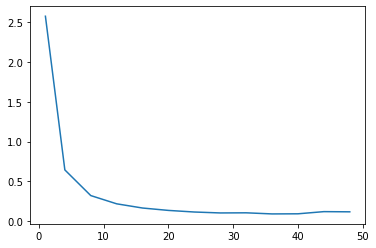

In [58]:
d09 = get_formatted_data("parallel-09.output", "parallel-09.error", launches)

In [62]:
d09[9]

{'P': 12,
 'trials': 999999996,
 'estimate': 3.141513241,
 'elapsed_t': 2.58,
 'master_t': 2.17695476,
 'procs_t': [2.15929677,
  2.17434147,
  2.17484054,
  2.1749156,
  2.17469826,
  2.17463813,
  2.17462083,
  2.17484683,
  2.17688645,
  2.17690909,
  2.17687413],
 'CPU': 11.2}

In [65]:
d08[10]

{'P': 12,
 'trials': 99999996,
 'estimate': 3.141557246,
 'elapsed_t': 0.61,
 'master_t': 0.21957637,
 'procs_t': [0.21472211,
  0.21471918,
  0.21469726,
  0.21481945,
  0.21470348,
  0.21477291,
  0.21481147,
  0.21886138,
  0.21824338,
  0.21945612,
  0.21922083],
 'CPU': 8.72}